# Visualisation of the effect of GDP on the art themes produced

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import colorsys
import plotly.io as pio
import sqlite3
import seaborn as sns


In [42]:
def process_themes(input_file, output_file):
    """
    Processes the themes from the input CSV file to identify the top 20 most popular themes 
    across all years and calculates their counts for each decade.

    Parameters:
        input_file (str): Path to the input CSV file with columns Year, Theme, Count.
        output_file (str): Path to the output CSV file to save the result.
    """
    # Read the input file
    data = pd.read_csv(input_file)
    
    # Convert 'Year' to 'Decade'
    data['Decade'] = (data['Year'] // 10 * 10).astype(str) + 's'
    
    # Get the top 20 themes across all years
    top_themes = (
        data.groupby('Theme')['Count']
        .sum()
        .sort_values(ascending=False)
        .head(20)
        .index
    )
    
    # Filter data to include only the top themes
    filtered_data = data[data['Theme'].isin(top_themes)]
    
    # Pivot the data to create a decade-by-theme table
    pivot_table = (
        filtered_data
        .groupby(['Decade', 'Theme'])['Count']
        .sum()
        .unstack(fill_value=0)
    )
    
    # Save the pivot table to the output CSV file
    pivot_table.to_csv(output_file)
    print(f"Output saved to {output_file}")

# Example usage
process_themes('all_art.csv', 'all_art_popular.csv')


Output saved to all_art_popular.csv


In [43]:
gdp_data = pd.read_csv('gdp_decade.csv')
GDP_by_decade_list = [f"${row['Rounded GDP (billions)']:.0f} bn in {row['Decade']}" 
                      for _, row in gdp_data.iterrows()]
GDP_by_decade = list(GDP_by_decade_list[:10])

print(GDP_by_decade)


art_data = pd.read_csv('all_art_popular.csv')
art_themes_list = list(art_data.columns[1:])

print(art_themes_list)

['$1191 bn in 1920s', '$1089 bn in 1930s', '$2140 bn in 1940s', '$2970 bn in 1950s', '$4369 bn in 1960s', '$6223 bn in 1970s', '$8374 bn in 1980s', '$11439 bn in 1990s', '$15544 bn in 2000s', '$18582 bn in 2010s']
['Animals', 'Architecture', 'Boats and boating', 'Botanical study', 'Children', 'Cityscapes', 'Clothing and dress', 'Domestic', 'Dress accessories', 'Figure female', 'Figure group', 'Figure male', 'Landscapes', 'Men', 'Nudity', 'Occupations', 'Portraits', 'Religion', 'Trees', 'Women']


In [44]:
def create_theme_array(csv_file):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Extract themes (columns excluding "Decade")
    themes = list(data.columns[1:])
    
    # Extract counts as a 2D NumPy array
    theme_counts = data.iloc[2:, 1:].values  
    
    return themes, theme_counts

# Usage
csv_file = "all_art_popular.csv"  # Replace with your file path
themes, theme_array = create_theme_array(csv_file)

# Print the themes list
print("Themes:", themes)

# Print the NumPy array
print("Theme Counts Array:")
print(theme_array)

Themes: ['Animals', 'Architecture', 'Boats and boating', 'Botanical study', 'Children', 'Cityscapes', 'Clothing and dress', 'Domestic', 'Dress accessories', 'Figure female', 'Figure group', 'Figure male', 'Landscapes', 'Men', 'Nudity', 'Occupations', 'Portraits', 'Religion', 'Trees', 'Women']
Theme Counts Array:
[[221 308  46 269  32 135  68  82  59 100 200  68 305 157  80 138 169  76
   65  66]
 [ 84 191  35 154  25  65  48  62  35  81 141  53 251  81  46  99 107  41
   41  60]
 [ 48  92  18  17   2  30  28  46  14  29  74  82 103  32   7  85  25  14
   11  16]
 [  5   8   0   0   2   0   4   5   2   4   6   4   9   2   1   2   4   3
    2   2]
 [  9  22   4   0   2   9   3  13   3   2  12   8  24   9   0   8   8   1
    5   3]
 [ 13   9   3   0   1   2   3   2   3   1   6   1   5   3   0   6   6   1
    3   4]
 [ 17   4   1   0  12   0   8   1   8   1   4   4   4  22   1   2  32   1
    0  15]
 [ 14  12   3   0   7   0   8   2   8   7   5   2   4   2   1   3   1   1
    0   3]
 [  0 

The array above is the absolute number of art pieces made in every art theme each decade from 1920s to 2010s. While the array below is the percentage of each art theme made each year out of the total number of the top 20 art themes each year.


In [45]:
# Step 1: Calculate the sum of each row (total paintings in each decade)
decade_totals = np.sum(theme_array, axis=1)

# Step 2: Normalize the array to percentage values
percentage_array = (theme_array.T / decade_totals).T * 100  # Transpose to divide by row totals
percentage_array_rounded = np.round(percentage_array, 0)

# Now, percentage_array contains the percentage of paintings for each theme per decade
print(percentage_array_rounded)

[[ 8. 12.  2. 10.  1.  5.  3.  3.  2.  4.  8.  3. 12.  6.  3.  5.  6.  3.
   2.  2.]
 [ 5. 11.  2.  9.  1.  4.  3.  4.  2.  5.  8.  3. 15.  5.  3.  6.  6.  2.
   2.  4.]
 [ 6. 12.  2.  2.  0.  4.  4.  6.  2.  4. 10. 11. 13.  4.  1. 11.  3.  2.
   1.  2.]
 [ 8. 12.  0.  0.  3.  0.  6.  8.  3.  6.  9.  6. 14.  3.  2.  3.  6.  5.
   3.  3.]
 [ 6. 15.  3.  0.  1.  6.  2.  9.  2.  1.  8.  6. 17.  6.  0.  6.  6.  1.
   3.  2.]
 [18. 12.  4.  0.  1.  3.  4.  3.  4.  1.  8.  1.  7.  4.  0.  8.  8.  1.
   4.  6.]
 [12.  3.  1.  0.  9.  0.  6.  1.  6.  1.  3.  3.  3. 16.  1.  1. 23.  1.
   0. 11.]
 [17. 14.  4.  0.  8.  0. 10.  2. 10.  8.  6.  2.  5.  2.  1.  4.  1.  1.
   0.  4.]
 [ 0. 13.  0.  0.  7.  0.  7.  0.  7.  0. 13.  7.  7. 20.  0.  0. 20.  0.
   0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 33. 33.
   0.  0.]]


/tmp/ipykernel_1759/218439095.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



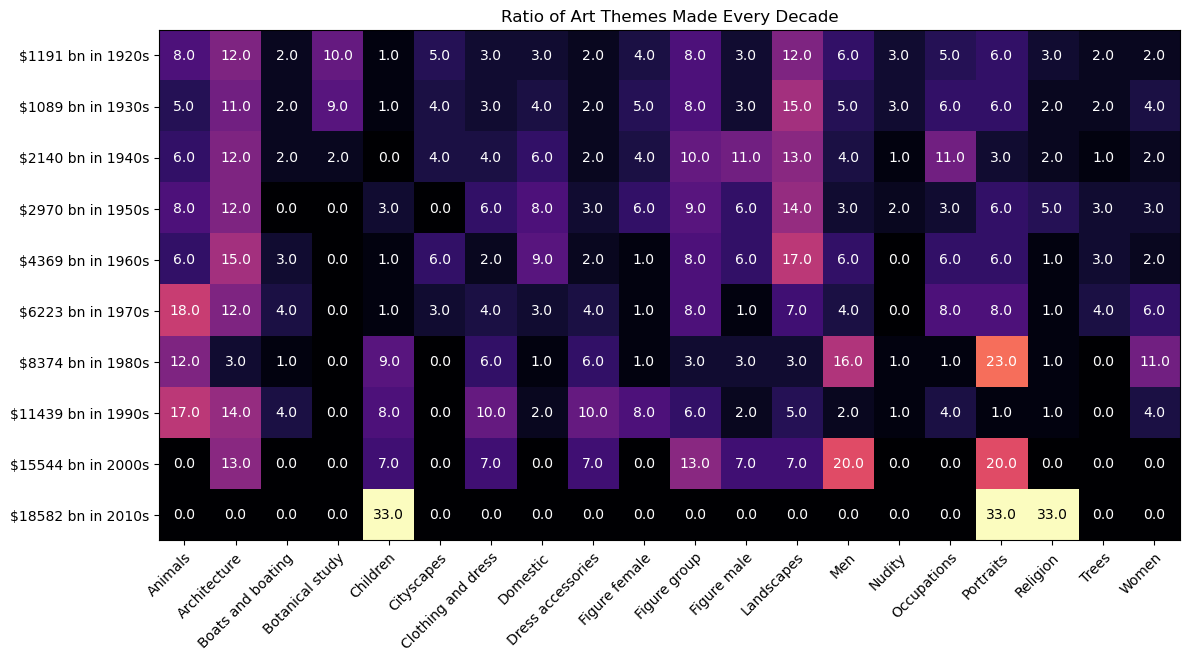

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
cmap = 'magma'  # this colormap is known to be accessible for people with colorblindness
im = ax.imshow(percentage_array_rounded, cmap=cmap)

# Show all ticks and label them
ax.set_xticks(range(len(art_themes_list)), labels=art_themes_list, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(GDP_by_decade)), labels=GDP_by_decade)

# Normalize the data to colormap range
norm = mcolors.Normalize(vmin=np.min(percentage_array_rounded), vmax=np.max(percentage_array_rounded))
colormap = cm.get_cmap(cmap)

# Loop over data dimensions and create text annotations
for i in range(len(GDP_by_decade)):
    for j in range(len(art_themes_list)):
        value = percentage_array_rounded[i, j]
        color = colormap(norm(value))  # Get RGBA color from colormap
        brightness = (0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2])  # Compute perceived brightness
        
        text_color = "black" if brightness > 0.6 else "white"  # Switch text color if background is bright so that the writing is visible to everyone, irregardless of background colour
        
        ax.text(j, i, value, ha="center", va="center", color=text_color)

ax.set_title("Ratio of Art Themes Made Every Decade")
fig.tight_layout()
plt.show()


pip install streamlit matplotlib in terminal 

Below I made a variable that lists GDP in ascending order, so the first value of GDP (the lowest) actually represents 1930s while the second represents 1920s. The rest are also in ascending order of decades, e.g. the third item in the list is 1940s and the fourth is 1950s.

In [47]:
file_path = "gdp_decade.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Extract the GDP values and sort them in ascending order
GDP_list = sorted(data['Rounded GDP (billions)'].tolist())

# Display the result
print(GDP_list)


[1089.0, 1191.0, 2140.0, 2970.0, 4369.0, 6223.0, 8374.0, 11439.0, 15544.0, 18582.0, 21617.0]


In [48]:

# Assuming theme_array is already defined
array_ordered = theme_array.copy()  # Create a copy to avoid modifying the original
array_ordered[[0, 1]] = array_ordered[[1, 0]]  # Swap the first two rows so that the rows are in increasing GDP order

print(array_ordered)


[[ 84 191  35 154  25  65  48  62  35  81 141  53 251  81  46  99 107  41
   41  60]
 [221 308  46 269  32 135  68  82  59 100 200  68 305 157  80 138 169  76
   65  66]
 [ 48  92  18  17   2  30  28  46  14  29  74  82 103  32   7  85  25  14
   11  16]
 [  5   8   0   0   2   0   4   5   2   4   6   4   9   2   1   2   4   3
    2   2]
 [  9  22   4   0   2   9   3  13   3   2  12   8  24   9   0   8   8   1
    5   3]
 [ 13   9   3   0   1   2   3   2   3   1   6   1   5   3   0   6   6   1
    3   4]
 [ 17   4   1   0  12   0   8   1   8   1   4   4   4  22   1   2  32   1
    0  15]
 [ 14  12   3   0   7   0   8   2   8   7   5   2   4   2   1   3   1   1
    0   3]
 [  0   2   0   0   1   0   1   0   1   0   2   1   1   3   0   0   3   0
    0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   1
    0   0]]


The interactive graph is shown below

In [49]:

art_themes = art_themes_list
GDP_by_decade = GDP_list
paintings_data = array_ordered

# Function to generate high-contrast colors
def generate_colors(n):
    colors = []
    for i in range(n):
        hue = (i * 137.5) % 360  # Spread colors around the HSL wheel
        rgb = colorsys.hls_to_rgb(hue / 360, 0.4, 1.0)  # Ensure mid-brightness
        hex_color = "#{:02x}{:02x}{:02x}".format(
            int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255)
        )
        colors.append(hex_color)
    return colors

# Generate a color list with good contrast
colors = generate_colors(len(art_themes))

# Calculate the average effect of GDP on paintings
average_paintings = np.mean(paintings_data, axis=1)

# Initialize figure
fig = go.Figure()

# Add traces for each art theme
for i, theme in enumerate(art_themes):
    fig.add_trace(
        go.Scatter(
            x=GDP_by_decade,
            y=paintings_data[:, i],
            name=theme,
            visible=(i == 0),
            line=dict(color=colors[i])
        )
    )

# Add a trace for the average effect (initially hidden)
fig.add_trace(
    go.Scatter(
        x=GDP_by_decade,
        y=average_paintings,
        name="Average Effect",
        visible=False,  # Initially hidden
        line=dict(color="black", width=3, dash="dashdot")  # Black dashed line
    )
)

# Create dropdown menu options
dropdown_options = [
    {
        "label": "All Themes",
        "method": "update",
        "args": [
            {"visible": [True] * len(art_themes) + [False]},  # Show all themes, hide average
            {"title": "Popularity of All Art Themes vs. GDP"}
        ]
    },
    {
        "label": "Average Effect",
        "method": "update",
        "args": [
            {"visible": [False] * len(art_themes) + [True]},  # Hide all themes, show average
            {"title": "Average Effect of GDP on Number of Paintings"}
        ]
    }
]

# Add individual theme options
dropdown_options.extend([
    {
        "label": theme,
        "method": "update",
        "args": [
            {"visible": [j == i for j in range(len(art_themes))] + [False]},  # Show only selected theme, hide average
            {"title": f"Popularity of {theme} vs. GDP"}
        ]
    }
    for i, theme in enumerate(art_themes)
])

# Apply layout fixes (White background, black y-axis, dark gray x-axis)
fig.update_layout(
    width=900, 
    height=600, 
    paper_bgcolor="white",  
    plot_bgcolor="white",
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        showline=True,
        linecolor="black",
        linewidth=2,
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        showline=True, 
        linecolor="black",  
        linewidth=2, 
        range=[0, np.max(paintings_data)],
    ),
    updatemenus=[
        {
            "buttons": dropdown_options,
            "direction": "down",
            "showactive": True,
            "x": 0.15,  
            "y": 1.1
        }
    ],
    title="Popularity of Art Themes vs. GDP",
    xaxis_title="GDP in billions of US$",
    yaxis_title="Number of Paintings",
)

# Display the figure
fig.show()

# Save as an interactive HTML file
pio.write_html(fig, "interactive_plot.html")


sqlite


In [9]:
import sqlite3

db_path = '../data/processed/social_movements.db'  # Use correct path

# Connect to database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# List all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:", tables)

conn.close()


Tables in the database: [('SmithsonianArtworks',), ('SocialMovements',), ('FRED',)]


In [15]:
import pandas as pd
import sqlite3

# Reconnect to the database
db_file = '../data/processed/social_movements.db'
conn = sqlite3.connect(db_file)

# Query to gather the 20 most popular themes between 1920 and 2010, excluding "None"
query = """
SELECT Topics, COUNT(*) AS ThemeCount
FROM SmithsonianArtworks
WHERE ProductionYear BETWEEN 1920 AND 2010
  AND Topics != 'None'
GROUP BY Topics
ORDER BY ThemeCount DESC
LIMIT 20;
"""

# Execute the query and store the results in a DataFrame
top_themes = pd.read_sql_query(query, conn)

# Display the top 20 most popular themes (excluding "None")
print(top_themes)

# Close the database connection
conn.close()


                                               Topics  ThemeCount
0                                       Figure female          41
1                                    Women, Portraits          33
2                                         Figure male          30
3                               Figure female, Nudity          30
4                                  Art, abstract, Art          24
5                                      Men, Portraits          20
6                            Flowers, Botanical study          13
7                             Plants, Botanical study          12
8                                     Animals, Horses          12
9   Uniforms, Soldiers, Occupations, Clothing and ...          10
10                                  Trees, Landscapes          10
11                           Men, Portraits, Children          10
12                                             Linens          10
13                                             Nudity           9
14        

In [21]:
import pandas as pd
import sqlite3
import re

# Function to clean theme names by stripping spaces, removing commas, and converting to lowercase
def clean_theme_name(theme):
    if isinstance(theme, str):  # Check if the theme is a string
        return re.sub(r'[^\w\s]', '', theme).strip().lower()
    return ''  # Return an empty string if the theme is None or NaN

# Reconnect to the database
db_file = '../data/processed/social_movements.db'
conn = sqlite3.connect(db_file)

# Query to gather all themes from 1900 to 2010 (including 2010s)
query = """
SELECT Topics, ProductionYear
FROM SmithsonianArtworks
WHERE ProductionYear BETWEEN 1900 AND 2010;
"""

# Execute the query and store the results in a DataFrame
data = pd.read_sql_query(query, conn)

# Clean the Topics column by applying the cleaning function to each theme
data['Cleaned_Topics'] = data['Topics'].apply(clean_theme_name)

# Print the first few rows to check the data format and themes
print(data.head())

# Get the top 20 most popular themes across the entire period (1900 to 2010)
top_themes = data['Cleaned_Topics'].value_counts().head(20).index.tolist()

# Print the top themes to verify they look correct
print("Top 20 themes: ", top_themes)

# Prepare a list of decades
decades = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

# Create an empty list to store the rows
decade_counts_list = []

# Loop through each decade and get the count for each top theme
for decade in decades:
    decade_counts = {'Decade': f'{decade}s'}
    
    for theme in top_themes:
        # Check if the theme appears in the Topics (we allow partial matches now)
        theme_count = data[(data['Cleaned_Topics'].str.contains(theme)) & 
                           (data['ProductionYear'] >= decade) & 
                           (data['ProductionYear'] < decade + 10)].shape[0]

        # Print intermediate results for debugging
        print(f"Decade: {decade}s | Theme: {theme} | Count: {theme_count}")

        decade_counts[theme] = theme_count
    
    decade_counts_list.append(decade_counts)

# Convert the list of dictionaries to a DataFrame
decade_counts = pd.DataFrame(decade_counts_list)

# Revert column names back to original theme names for better readability
decade_counts.columns = ['Decade'] + top_themes

# Save the data to a CSV file
csv_file_path = 'top_themes_by_decade_updated.csv'
decade_counts.to_csv(csv_file_path, index=False)

# Close the database connection
conn.close()

# Notify the user of the saved file path
print(f"Top themes by decade saved to {csv_file_path}")


                                              Topics  ProductionYear  \
0  Animals, Farmers, Architecture, Donkey, Farms,...            1900   
1                                         Containers            1900   
2                 Religion, Crucifixion, Bible, N.T.            2010   
3                                  Trees, Landscapes            1930   
4                                 Pegasus, Mythology            1900   

                                      Cleaned_Topics  
0  animals farmers architecture donkey farms occu...  
1                                         containers  
2                      religion crucifixion bible nt  
3                                   trees landscapes  
4                                  pegasus mythology  
Top 20 themes:  ['', 'women portraits', 'graphic arts', 'figure female', 'men portraits', 'figure female nudity', 'figure male', 'art abstract art', 'linens', 'animals fishes', 'plants botanical study', 'flowers botanical study', 'citysc